# Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df=pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# EDA & Some Cleaning

In [2]:
len1=df.shape[0]
len1

6019

In [3]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().mean()*100

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [7]:
df.drop(["Unnamed: 0","New_Price"],axis=1,inplace=True)

In [8]:
df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2419,Honda Amaze S i-Vtech,Delhi,2014,69876,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,3.90
2471,Nissan Micra XV CVT,Chennai,2013,89000,Petrol,Automatic,Second,19.34 kmpl,1198 CC,76 bhp,5.0,2.80
2215,Hyundai i20 Asta 1.4 CRDi (Diesel),Ahmedabad,2009,68000,Diesel,Manual,Second,23.0 kmpl,1396 CC,90 bhp,5.0,3.95
2747,Maruti Swift Dzire 1.2 Vxi BSIV,Mumbai,2012,83000,Petrol,Manual,First,17.5 kmpl,1197 CC,85.8 bhp,5.0,3.25
2265,Maruti Alto LX,Kolkata,2009,68078,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0,1.02
1696,Mahindra Scorpio VLX,Mumbai,2011,100010,Diesel,Manual,Second,12.05 kmpl,2179 CC,120 bhp,8.0,5.50
4177,Hyundai Verna 1.6 SX,Hyderabad,2012,65254,Diesel,Manual,First,22.32 kmpl,1582 CC,126.32 bhp,5.0,6.55
45,Toyota Corolla Altis G AT,Mumbai,2016,52001,Petrol,Automatic,First,14.28 kmpl,1798 CC,138.03 bhp,5.0,10.11
3166,Chevrolet Sail 1.2 LS,Mumbai,2014,10000,Petrol,Manual,First,18.2 kmpl,1199 CC,82.4 bhp,5.0,5.50
3948,Mercedes-Benz New C-Class C 220 CDI CLASSIC,Jaipur,2009,116000,Diesel,Manual,Second,15.8 kmpl,2148 CC,170 bhp,5.0,8.50


In [9]:
df.Name.str.contains("Land Rover").sum()

np.int64(60)

In [10]:
df.Name[df.Name.str.contains("Land Rover")].sample(10)

3043                 Land Rover Discovery Sport TD4 HSE
5067       Land Rover Discovery Sport SD4 HSE Luxury 7S
1259                      Land Rover Freelander 2 TD4 S
1352    Land Rover Range Rover 3.6 TDV8 Vogue SE Diesel
480          Land Rover Range Rover Evoque 2.0 TD4 Pure
1505                    Land Rover Range Rover Sport SE
4058                 Land Rover Discovery Sport TD4 HSE
5477                 Land Rover Range Rover HSE Dynamic
4869           Land Rover Range Rover 3.6 TDV8 Vogue SE
4701                         Land Rover Freelander 2 SE
Name: Name, dtype: object

In [11]:
def get_brand(name):
    if name.startswith("Land Rover"):
        return "Land Rover"
    else:
        return name.split(' ')[0]
df['Brand']=df.Name.apply(get_brand)

In [12]:
def get_model(name):
    if name.startswith("Land Rover"):
        if name.startswith("Land Rover Range Rover"):
            return "Range Rover"
        else:
            return name.split(' ')[2] 
    else:
        return name.split(' ')[1]   
    
df['Model']=df.Name.apply(get_model)    

In [13]:
df[df.Name.str.contains('Land Rover')].sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
1513,Land Rover Range Rover 2.2L Pure,Bangalore,2014,56000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,34.50,Land Rover,Range Rover
521,Land Rover Range Rover HSE Dynamic,Coimbatore,2017,49275,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,45.64,Land Rover,Range Rover
3242,Land Rover Range Rover Vogue SE 4.4 SDV8,Bangalore,2012,63000,Diesel,Automatic,Second,11.49 kmpl,4367 CC,335.3 bhp,5.0,65.00,Land Rover,Range Rover
480,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,Automatic,Second,15.68 kmpl,1999 CC,177 bhp,5.0,33.50,Land Rover,Range Rover
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,15.50,Land Rover,Freelander
4814,Land Rover Freelander 2 SE,Delhi,2013,68000,Diesel,Automatic,Second,12.39 kmpl,2179 CC,147.51 bhp,5.0,15.75,Land Rover,Freelander
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,Land Rover,Freelander
5038,Land Rover Discovery Sport TD4 HSE 7S,Coimbatore,2019,24013,Diesel,Automatic,First,12.81 kmpl,1999 CC,148.31 bhp,7.0,56.14,Land Rover,Discovery
4466,Land Rover Freelander 2 SE,Kochi,2014,61730,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,19.94,Land Rover,Freelander
5530,Land Rover Freelander 2 SE,Kochi,2014,59885,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,20.11,Land Rover,Freelander


In [14]:
df.drop(['Name'],axis=1,inplace=True)

In [15]:
df['Age']= (df.Year.max()+1) - df.Year

In [16]:
df.sample(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age
2964,Kochi,2014,46728,Petrol,Automatic,First,15.6 kmpl,1497 CC,116.3 bhp,5.0,6.15,Honda,City,6
1141,Coimbatore,2017,30090,Diesel,Automatic,First,19.6 kmpl,1461 CC,108.45 bhp,5.0,11.44,Renault,Duster,3
757,Kolkata,2013,42103,Petrol,Manual,First,16.78 kmpl,1496 CC,88.73 bhp,5.0,3.25,Toyota,Etios,7
1246,Coimbatore,2018,32496,Diesel,Automatic,First,13.22 kmpl,2967 CC,241.4 bhp,5.0,45.62,Audi,Q5,2
3248,Kochi,2011,58752,Petrol,Manual,First,16.47 kmpl,1198 CC,73.9 bhp,5.0,3.32,Volkswagen,Polo,9
5993,Mumbai,2014,55619,Petrol,Manual,First,16.3 kmpl,1797 CC,147.5 bhp,5.0,8.30,Hyundai,Elantra,6
317,Delhi,2012,65000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Maruti,Wagon,8
3051,Delhi,2016,16000,Diesel,Automatic,First,11.3 kmpl,2987 CC,254.8 bhp,7.0,56.00,Mercedes-Benz,GL-Class,4
1590,Mumbai,2015,27030,Petrol,Manual,First,17.8 kmpl,1497 CC,117.3 bhp,5.0,6.75,Honda,City,5
139,Delhi,2012,88578,Petrol,Manual,First,13.5 kmpl,1799 CC,130 bhp,5.0,3.95,Honda,Civic,8


In [17]:
df.describe(include='O')

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Brand,Model
count,6019,6019,6019,6019,6017,5983,5983,6019,6019
unique,11,5,2,4,442,146,372,31,214
top,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,Maruti,Swift
freq,790,3205,4299,4929,172,606,235,1211,353


In [18]:
df[df.Kilometers_Driven == df.Kilometers_Driven.max()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Age
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,BMW,X5,3


In [19]:
df.drop(df[df['Kilometers_Driven'] > 300000].index, inplace=True)


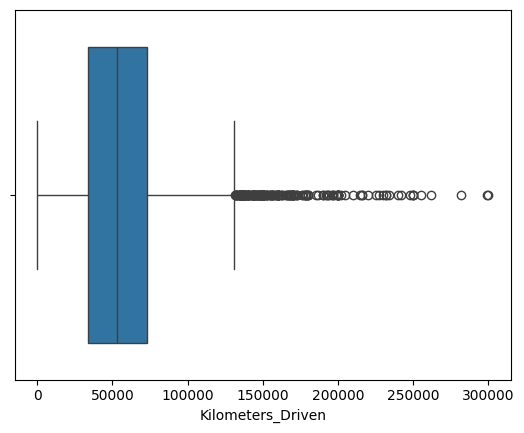

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(x='Kilometers_Driven', data=df)
plt.show()

In [21]:
df.isna().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
Model                 0
Age                   0
dtype: int64

In [22]:
df.dropna(inplace=True)


In [23]:
# fuel densities (kg/L)
fuel_densities = {
"CNG": 0.43,
"Diesel": 0.832,
"Petrol": 0.74,
"LPG": 0.54
}
def convert_to_kmpl(row):
    fuel = row['Fuel_Type']
    mileage = float(row['Mileage'].split()[0])
    unit = row['Mileage'].split()[1]
    if fuel in fuel_densities:
        if unit == 'km/kg':
            return mileage * fuel_densities [fuel]
        elif unit == 'kmpl':
            return mileage
    return np.nan
# Apply conversion to DataFrame
df['Mileage_converted'] = df.apply(convert_to_kmpl, axis=1)


In [24]:
def get_engine(Engine):
    return float(Engine['Engine'].split(" ")[0])
df['Engine_value'] = df.apply(get_engine,axis=1)

In [25]:
'''
 def get_power(power):
    return float(power['Power'].spilt(" ")[0])
df['Power_Value']=df.apply(get_power,axis=1)
'''
df['Power_Vaule']=pd.to_numeric(df['Power'].str.split().str[0],errors='coerce')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5968 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5968 non-null   object 
 1   Year               5968 non-null   int64  
 2   Kilometers_Driven  5968 non-null   int64  
 3   Fuel_Type          5968 non-null   object 
 4   Transmission       5968 non-null   object 
 5   Owner_Type         5968 non-null   object 
 6   Mileage            5968 non-null   object 
 7   Engine             5968 non-null   object 
 8   Power              5968 non-null   object 
 9   Seats              5968 non-null   float64
 10  Price              5968 non-null   float64
 11  Brand              5968 non-null   object 
 12  Model              5968 non-null   object 
 13  Age                5968 non-null   int64  
 14  Mileage_converted  5968 non-null   float64
 15  Engine_value       5968 non-null   float64
 16  Power_Vaule        5865 non-n

In [27]:
df.drop(['Mileage','Engine','Power'],inplace=True,axis=1)

In [28]:
df =df[df.Seats > 0]

In [29]:
df.sample(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Age,Mileage_converted,Engine_value,Power_Vaule
5495,Mumbai,2015,26000,Diesel,Automatic,First,5.0,12.65,Hyundai,Creta,5,17.01,1582.0,126.20
377,Mumbai,2017,5900,Diesel,Manual,First,5.0,16.50,Toyota,Corolla,3,21.43,1364.0,87.20
4033,Hyderabad,2006,69000,Petrol,Manual,First,5.0,2.15,Ford,Fiesta,14,16.60,1388.0,68.00
4582,Kolkata,2011,36000,Petrol,Manual,First,5.0,2.50,Hyundai,i20,9,18.50,1197.0,80.00
5451,Kolkata,2016,26000,Diesel,Manual,First,5.0,5.00,Hyundai,Xcent,4,25.40,1186.0,73.97
5012,Kochi,2018,42243,Diesel,Manual,First,5.0,7.48,Maruti,Baleno,2,27.39,1248.0,74.00
237,Kolkata,2011,32572,Petrol,Manual,First,5.0,3.87,Honda,City,9,17.40,1497.0,117.30
5942,Jaipur,2011,119000,Diesel,Manual,Third,7.0,6.50,Ford,Endeavour,9,13.10,2499.0,141.00
5056,Bangalore,2011,47000,Diesel,Manual,Second,5.0,6.00,Ford,Fiesta,9,23.50,1498.0,90.00
5054,Ahmedabad,2015,42150,Diesel,Manual,First,5.0,3.60,Maruti,Celerio,5,27.62,793.0,47.00


In [30]:
df.describe()

,Year,Kilometers_Driven,Seats,Price,Age,Mileage_converted,Engine_value,Power_Vaule
count,5967.000000,5967.000000,5967.000000,5967.000000,5967.000000,5967.000000,5967.000000,5865.000000
mean,2013.386794,57052.795710,5.280040,9.494015,6.613206,18.029481,1621.163901,113.255275
std,3.248385,33758.843294,0.806553,11.188750,3.248385,4.498948,600.745428,53.875213
min,1998.000000,171.000000,2.000000,0.440000,1.000000,0.000000,624.000000,34.200000
25%,2011.500000,33879.000000,5.000000,3.500000,4.000000,15.100000,1198.000000,75.000000
50%,2014.000000,53000.000000,5.000000,5.650000,6.000000,18.000000,1493.000000,97.700000
75%,2016.000000,72819.000000,5.000000,9.950000,8.500000,21.000000,1984.000000,138.100000
max,2019.000000,300000.000000,10.000000,160.000000,22.000000,28.400000,5998.000000,560.000000


In [31]:
df.describe(include='O')

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Model
count,5967,5967,5967,5967,5967,5967
unique,11,4,2,4,31,211
top,Mumbai,Diesel,Manual,First,Maruti,Swift
freq,784,3191,4262,4895,1197,343


In [32]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [33]:
import plotly.express as px
numeric_cols = df.select_dtypes (include=[np.number]).columns.tolist()
for col in numeric_cols:
    fig = px.histogram(df, x=col, marginal='box', title=f'Distribution of (col)', nbins=30)
    fig.show()

In [34]:
df=df[df.Year>=2006]
df=df[df.Engine_value<3000]
df=df[df.Kilometers_Driven<180000]
df=df[df.Power_Vaule<=265]
df['Mileage_converted']=df['Mileage_converted'].replace(0,np.nan)

In [35]:
for col in numeric_cols:
    fig = px.histogram(df, x=col, marginal='box', title=f'Distribution of (col)', nbins=30)
    fig.show()

In [36]:
df.shape[0] / len1

0.9335437780362187

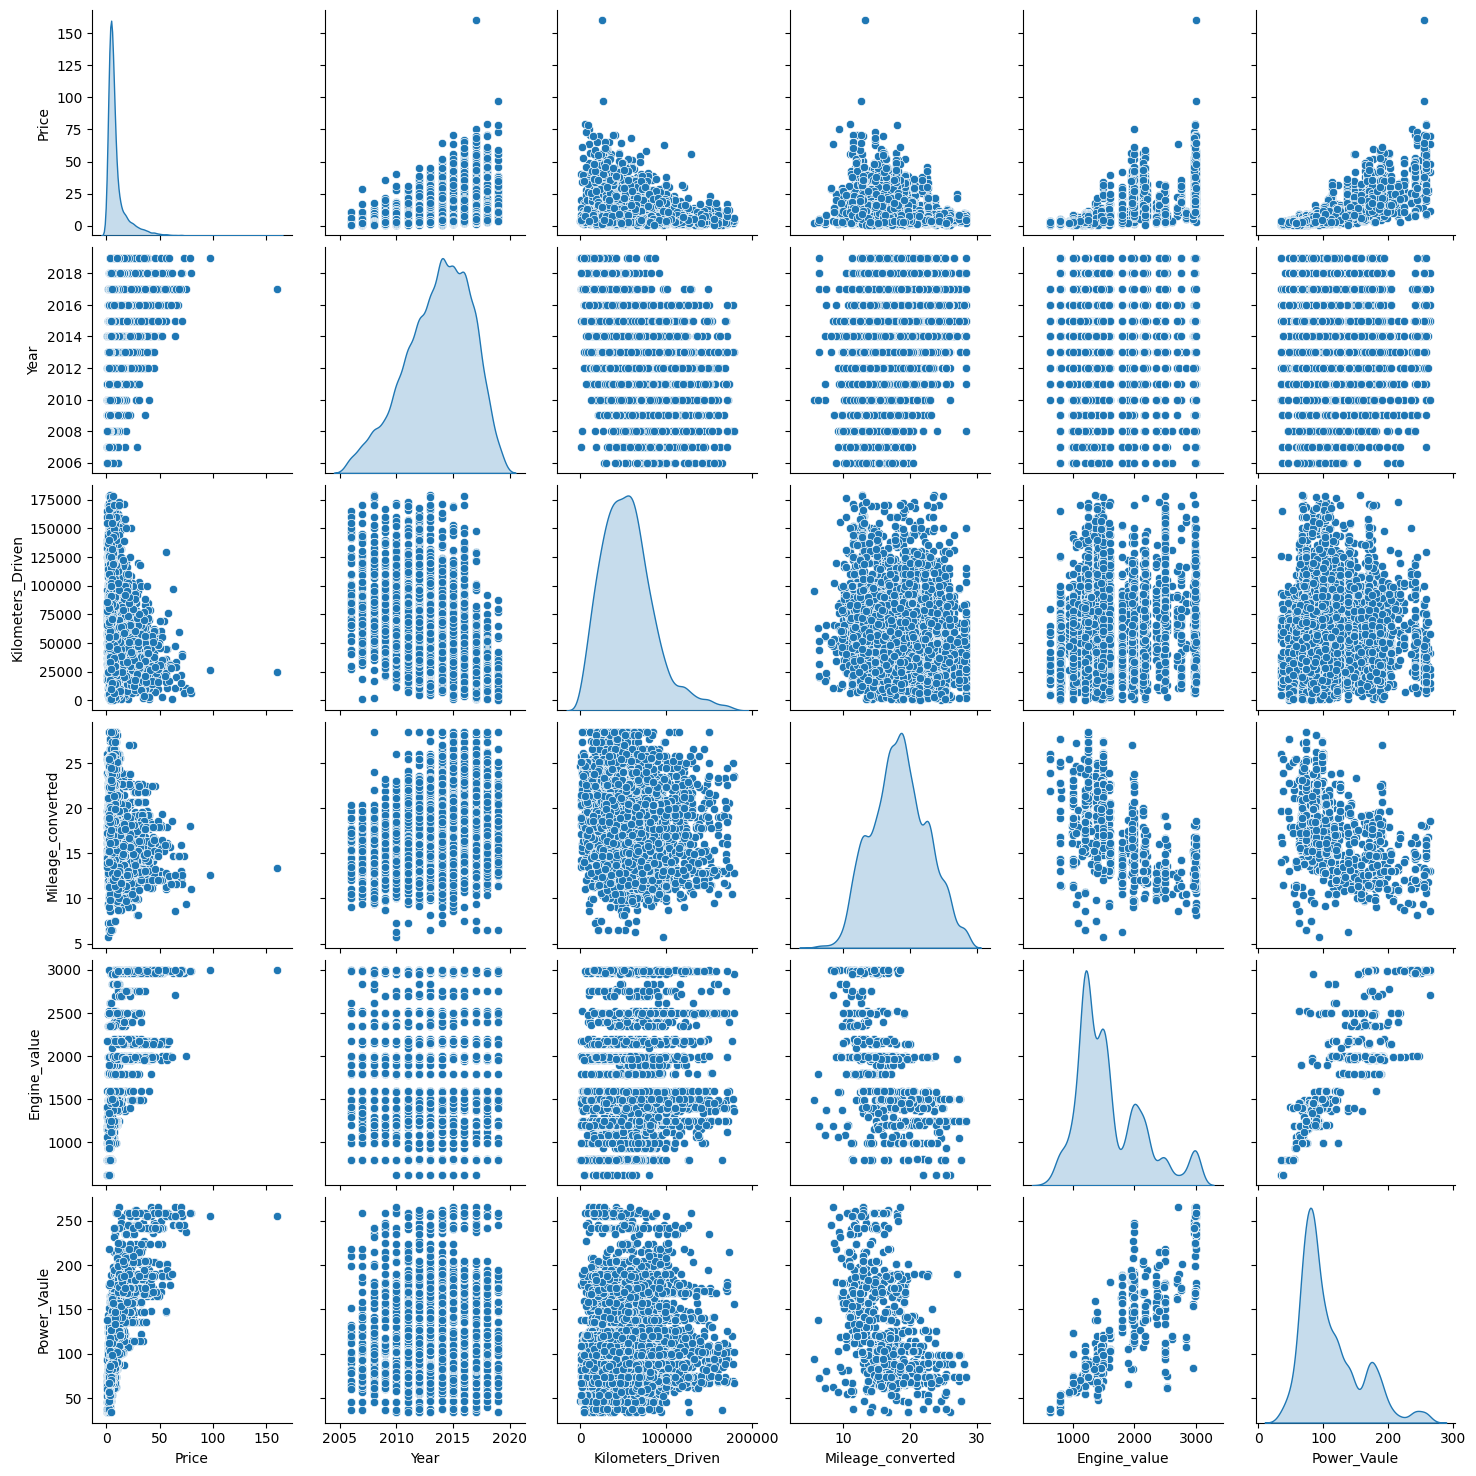

In [37]:
sns.pairplot(df[['Price', 'Year', 'Kilometers_Driven', 'Mileage_converted', 'Engine_value', 'Power_Vaule']], diag_kind='kde')

# Data Splitting


In [38]:
x=df.drop(['Price','Year'],axis=1)
y=df['Price']

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Age,Mileage_converted,Engine_value,Power_Vaule
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,Wagon,10,11.438,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,5,19.670,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,Jazz,9,18.200,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,8,20.770,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,A4,7,15.200,1968.0,140.80


In [41]:
num_cols=['Kilometers_Driven','Seats','Age','Mileage_converted','Engine_value','Power_Vaule']
nom_cat_cols=['Location','Fuel_Type','Brand','Model']
ord_cat_cols=['Owner_Type']

# Data Preprocessing

In [42]:
#! pip install category_encoders

In [43]:
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


numerical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                                      ('scaler',StandardScaler())])
nomenal_categorical_transformer=Pipeline(steps=[('binary',BinaryEncoder())])

ordinal_categorical_transformer=Pipeline(steps=[('ordinal',OrdinalEncoder(categories=[['Fourth & Above','Third','Second','First']]))])

preprocesser=ColumnTransformer(transformers=[('num_prep',numerical_transformer,num_cols),
                                             ('nom_prep',nomenal_categorical_transformer,nom_cat_cols),
                                             ('ord_prep',ordinal_categorical_transformer,ord_cat_cols)])
x_train_prep=preprocesser.fit_transform(x_train)
x_test_prep=preprocesser.transform(x_test)

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_prep,y_train)
y_pred=lr.predict(x_test_prep)
print('Traning Accurcy: ',lr.score(x_train_prep,y_train))
print('Testing Accurcy: ',lr.score(x_test_prep,y_test))


Traning Accurcy:  0.73757783794271
Testing Accurcy:  0.7532740959843369


In [45]:
from sklearn.preprocessing import PolynomialFeatures

numerical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                                      ('poly',PolynomialFeatures(degree=2)),
                                      ('scaler',StandardScaler())])
nomenal_categorical_transformer=Pipeline(steps=[('binary',BinaryEncoder())])

ordinal_categorical_transformer=Pipeline(steps=[('ordinal',OrdinalEncoder(categories=[['Fourth & Above','Third','Second','First']]))])

preprocesser=ColumnTransformer(transformers=[('num_prep',numerical_transformer,num_cols),
                                             ('nom_prep',nomenal_categorical_transformer,nom_cat_cols),
                                             ('ord_prep',ordinal_categorical_transformer,ord_cat_cols)])
x_train_poly=preprocesser.fit_transform(x_train)
x_test_poly=preprocesser.transform(x_test)

In [46]:
lr_poly=LinearRegression()
lr_poly.fit(x_train_poly,y_train)

print('Traning Accurcy: ',lr_poly.score(x_train_poly,y_train))
print('Testing Accurcy: ',lr_poly.score(x_test_poly,y_test))


Traning Accurcy:  0.8608329630869347
Testing Accurcy:  0.8664766862697965


In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge =Ridge()
ridge.fit(x_train_prep,y_train)
y_pred=ridge.predict(x_test_prep)
print("r2: ", r2_score(y_test,y_pred))

r2:  0.7532808654972085


In [48]:


ridge =Ridge()
ridge.fit(x_train_poly,y_train)
y_pred=ridge.predict(x_test_poly)
print("r2: ", r2_score(y_test,y_pred))

r2:  0.866155053449049


In [49]:
from sklearn.linear_model import Lasso
la =Lasso(alpha=0.01,max_iter=1000)
la.fit(x_train_poly,y_train)
la_pred=la.predict(x_test_poly)
print('r2: ',r2_score(y_test,la_pred))


r2:  0.8652891454268473


In [50]:
def prep(ploy_dgree):
    numerical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                                      ('poly',PolynomialFeatures(degree=ploy_dgree)),
                                      ('scaler',StandardScaler())])
    nomenal_categorical_transformer=Pipeline(steps=[('binary',BinaryEncoder())])

    ordinal_categorical_transformer=Pipeline(steps=[('ordinal',OrdinalEncoder(categories=[['Fourth & Above','Third','Second','First']]))])

    preprocesser=ColumnTransformer(transformers=[('num_prep',numerical_transformer,num_cols),
                                             ('nom_prep',nomenal_categorical_transformer,nom_cat_cols),
                                             ('ord_prep',ordinal_categorical_transformer,ord_cat_cols)])
    return preprocesser
     

In [51]:
def prep_and_fit(poly_degree,alpha):
    ridge=Ridge(alpha=alpha)
    model = Pipeline(steps=[('preprocesser',prep(poly_degree)),
                        ('model',LinearRegression())])

    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    test_score = model.score(x_test,y_test) 
    return test_score 

In [52]:
prep_and_fit(3,1)

0.8736102630307221

# Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score

model = Pipeline(steps=[('preprocessor', prep(2)),
                        ('model', LinearRegression())])

scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
scores

array([0.84420711, 0.87337562, 0.87308602, 0.86662602, 0.80515692])

In [54]:
print('Mean CV R2:', scores.mean())
print('Std Dev of CV R2:', scores.std())

Mean CV R2: 0.8524903402131953
Std Dev of CV R2: 0.025958657357605535


# Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='median')),
                                         ('poly', PolynomialFeatures()),
                                         ('scaler', StandardScaler())])

# Preprocessing for categorical data
nominal_categorical_transformer = Pipeline(steps=[('binary', BinaryEncoder())])
ordinal_categorical_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder(categories=[['Fourth & Above', 'Third', 'Second', 'First']]))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[('num_prep', numerical_transformer, num_cols),
                                                ('nom_prep', nominal_categorical_transformer, nom_cat_cols),
                                                ('ord_prep', ordinal_categorical_transformer, ord_cat_cols)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', Ridge())])

param_grid = {
                'preprocessor__num_prep__poly__degree': [2, 3, 4],
                'model__alpha': [0.01, 0.1, 1, 10]
            }

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,"Pipeline(step...l', Ridge())])"
,param_grid,"{'model__alpha': [0.01, 0.1, ...], 'preprocessor__num_prep__poly__degree': [2, 3, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num_prep', ...), ('nom_prep', ...), ...]"


In [56]:
grid_search.best_params_

{'model__alpha': 0.01, 'preprocessor__num_prep__poly__degree': 4}

In [57]:
model = grid_search.best_estimator_
print('Test R2:', model.score(x_test, y_test))

Test R2: 0.8745090072876804


# Log Transformation

In [58]:
# Log Transform for the target
def log_transform(x):
    return np.log1p(x)

# Log Transform
y_train_log = log_transform(y_train)
y_test_log = log_transform(y_test)

In [59]:
from  plotly.subplots  import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=['Before Log Transform', 'After Log Transform'])

fig.add_trace(go.Histogram(x=y_train, name='Before Log Transform'), row=1, col=1)
fig.add_trace(go.Histogram(x=y_train_log, name='After Log Transform'), row=1, col=2)

fig.show()

In [60]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train_log)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,estimator,Pipeline(step...alpha=0.01))])
,param_grid,"{'model__alpha': [0.01, 0.1, ...], 'preprocessor__num_prep__poly__degree': [2, 3, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num_prep', ...), ('nom_prep', ...), ...]"


In [61]:
grid_search.best_params_

{'model__alpha': 0.1, 'preprocessor__num_prep__poly__degree': 4}

In [62]:
grid_search.best_score_

np.float64(0.9085604748455804)

In [63]:
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train_log)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_prep', ...), ('nom_prep', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [64]:
print('Test R2:', best_model.score(x_test, y_test_log))

Test R2: 0.9104772692422411


In [65]:
log_price = best_model.predict(x_test.iloc[17].to_frame().T)
np.expm1(log_price)  # convert back to price

array([6.03365577])

In [66]:
y_test.iloc[17]  # actual price

np.float64(6.0)

# Saving

In [67]:
import pickle  

# Model Saving
pickle.dump(best_model, open('ml_model.pkl', 'wb'))